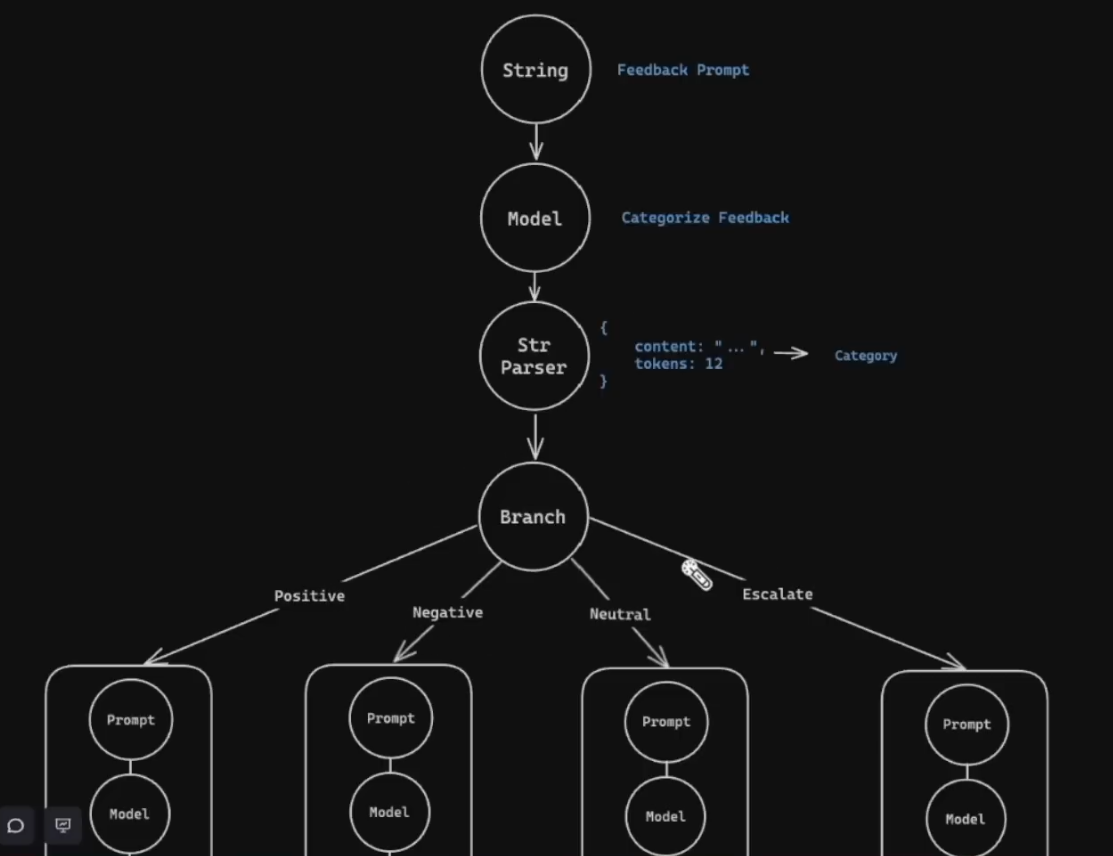

In [1]:
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain.schema import StrOutputParser
from langchain.schema.runnable import RunnableBranch
from langchain.prompts import ChatPromptTemplate

load_dotenv()

True

In [2]:
model = ChatGroq(model="llama3-8b-8192")

In [3]:
system_msg = "You are a helpfull assistant"


positive_feedback_template = ChatPromptTemplate.from_messages([
    ("system", system_msg),
    ("human", "Generate a thank note for this positive feedback: {feedback}")
])

negative_feedback_template = ChatPromptTemplate.from_messages([
    ("system", system_msg),
    ("human", "Generate a response addressing this negative feedback: {feedback}")
])

neutral_feedback_template = ChatPromptTemplate.from_messages([
    ("system", system_msg),
    ("human", "Generate a request for more details for this neutral feedback: {feedback}")
])

escalate_feedback_template = ChatPromptTemplate.from_messages([
    ("system", system_msg),
    ("human", "Generate a message to escalate this feedback to a human agent: {feedback}")
])


classification_template = ChatPromptTemplate.from_messages([
    ("system", system_msg),
    ("human", "Classify the sentiment of this feedback as positive, negative, neutral, or escalate: {feedback}")
])

Kode di bawah ini akan menjalankan `RunnableBranch` yang mana jika `"..."` ada di dalam `x` maka branch itu akan dijalankan. Tiap cabang akan berjalan bersamaan.

Namun, jika tidak ada branch yang berjalan, maka akan dijalankan branch default yaitu escalate branch

In [ ]:
branches = RunnableBranch(
    (
      lambda x: "positive" in x,
      positive_feedback_template | model | StrOutputParser()  # Positive Branch
    ),
    (
      lambda x: "negative" in x,
      negative_feedback_template | model | StrOutputParser()  # Negative Branch
    ),
    (
      lambda x: "neutral" in x,
      neutral_feedback_template | model | StrOutputParser()   # Neutral Branch
    ),
    escalate_feedback_template | model | StrOutputParser()
)

In [6]:
classification_chain = classification_template | model | StrOutputParser()

In [7]:
chain = classification_chain | branches

In [10]:
result = chain.invoke({"feedback": "The product is realy bad. I realy dont like it. It broken when the first time i open the box. Realy bat product."})
print(result)

Dear valued customer,

I am so sorry to hear that our product did not meet your expectations. We apologize for the inconvenience and frustration caused by the issues you experienced. We take all feedback seriously and would like to make things right.

Can you please provide us with more details about the problem you encountered, such as the specific issue you faced and when it occurred? This will help us to better understand what went wrong and how we can prevent similar issues in the future.

We also want to assure you that we are committed to providing high-quality products that meet our customers' needs. We will do our best to resolve the issue you experienced and provide a satisfactory solution.

If you are willing, we would like to offer you a replacement or a full refund for the defective product. Please let us know how we can make it right.

Thank you for your feedback, and we look forward to hearing from you soon.

Best regards,
[Your Name/Company]
